In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

In [4]:
california_housing = fetch_california_housing(as_frame=True)

In [5]:
california_data = california_housing.frame
california_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
california_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Before we start our pridiction, we're going to determine which features in this dataset are most relevant for the model prediction. Now we will create visualization like correlation matrices and scatter plots using seaborn.

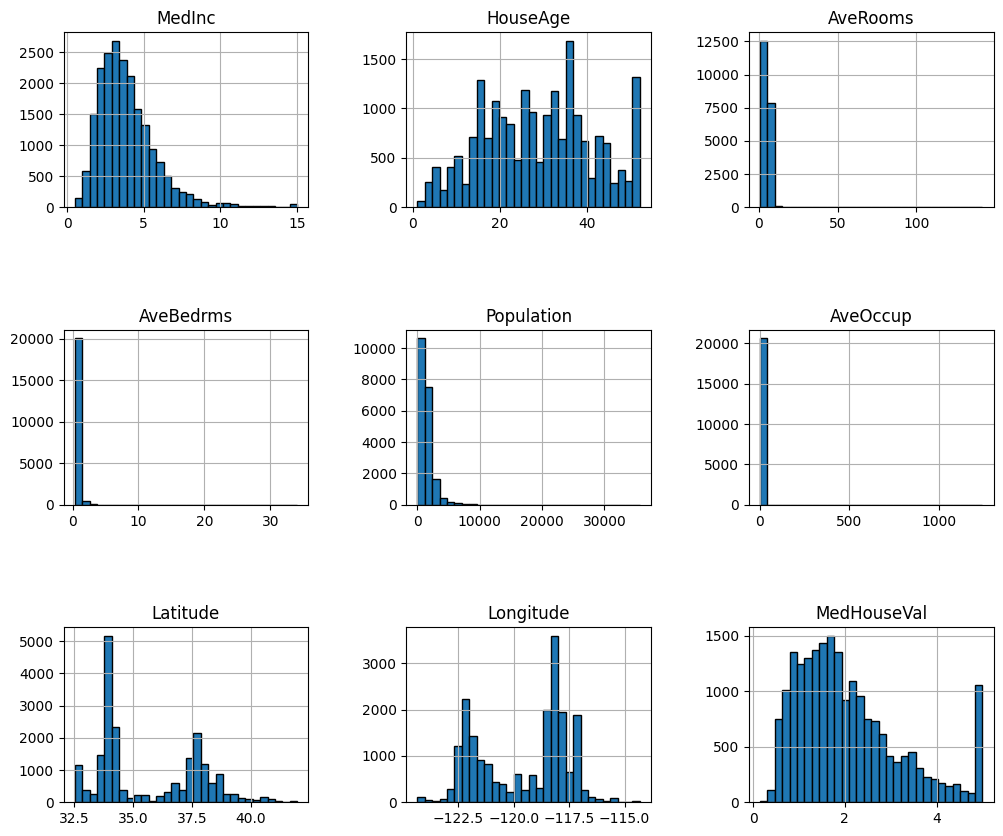

In [25]:
california_data.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

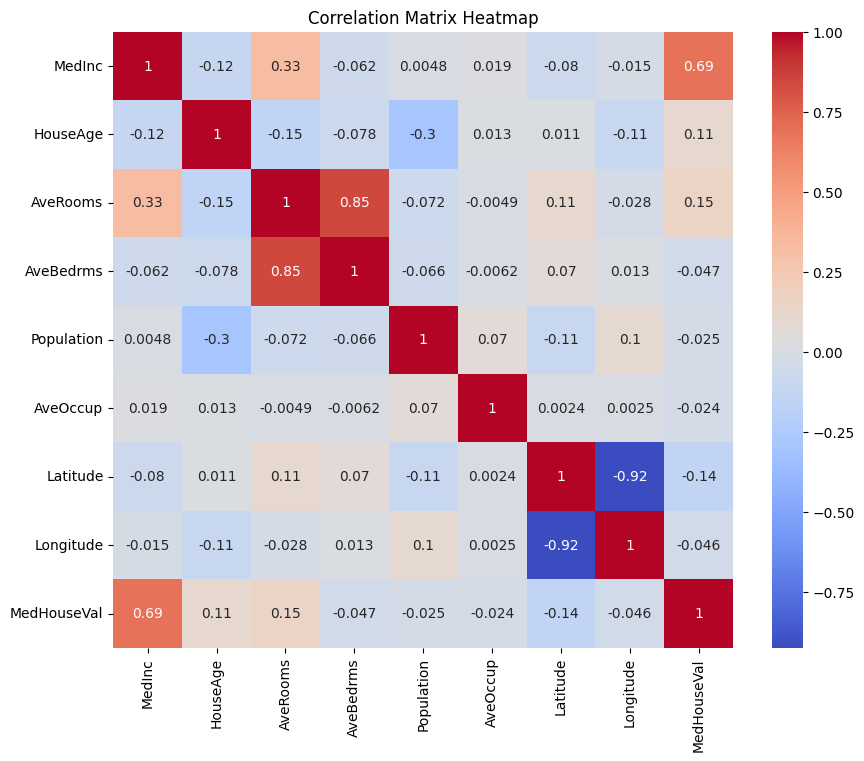

In [6]:
correlation_matrix = california_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

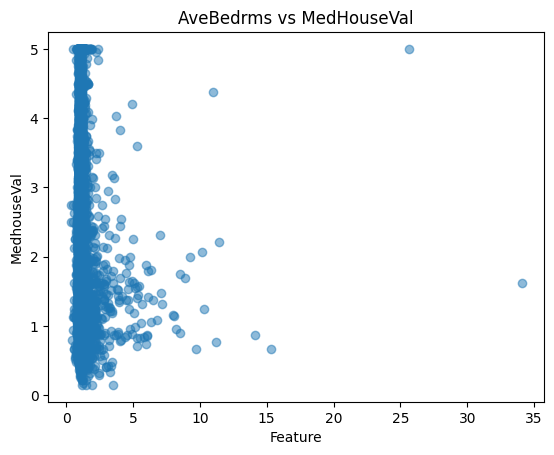

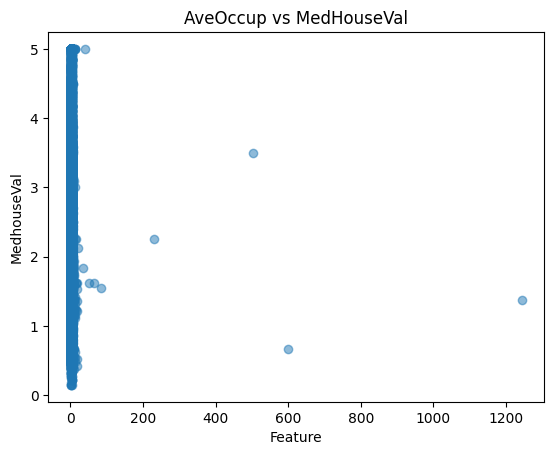

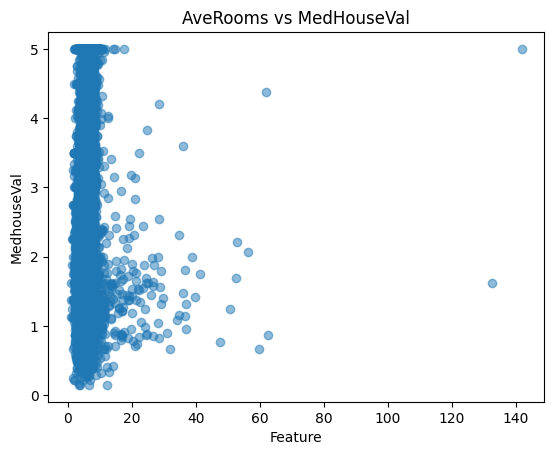

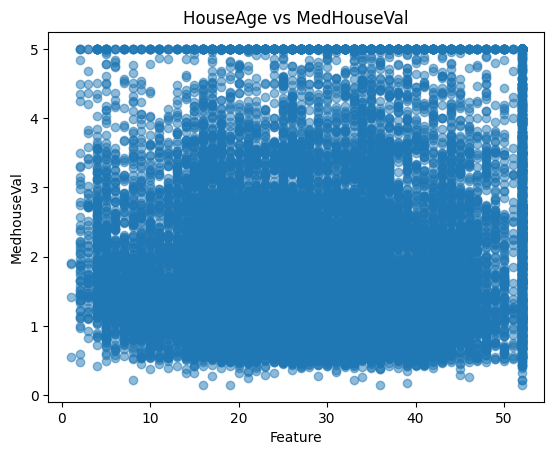

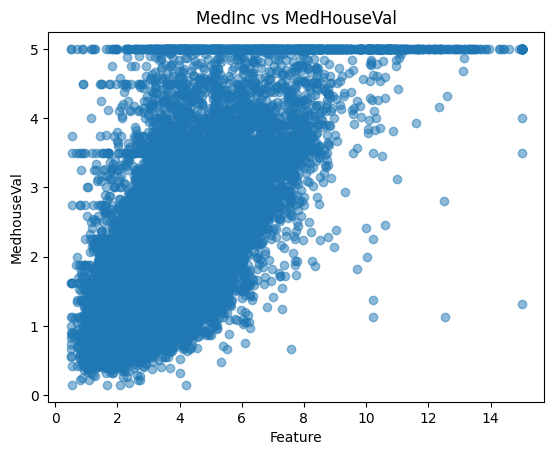

In [15]:
features = ['AveBedrms', 'AveOccup', 'AveRooms', 'HouseAge', 'MedInc' ]

for feature in features:
    plt.scatter(california_data[feature], california_data['MedHouseVal'], alpha=0.5)
    plt.xlabel('Feature')
    plt.ylabel('MedhouseVal')
    plt.title(f'{feature} vs MedHouseVal')
    plt.show()


In [11]:
correlation_with_target = correlation_matrix['MedHouseVal']
correlation_with_target

MedInc         0.688075
HouseAge       0.105623
AveRooms       0.151948
AveBedrms     -0.046701
Population    -0.024650
AveOccup      -0.023737
Latitude      -0.144160
Longitude     -0.045967
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

In [12]:
sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)
sorted_correlation

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
Latitude       0.144160
HouseAge       0.105623
AveBedrms      0.046701
Longitude      0.045967
Population     0.024650
AveOccup       0.023737
Name: MedHouseVal, dtype: float64

After all, now we are going to use Median Income (MedInc) to buil a model. 

In [26]:
x = california_data[['MedInc']]
y = california_data['MedHouseVal']

In [30]:
x_train, x_test, y_tain, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [31]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_tain)

LinearRegression()

In [32]:
y_pred = linear_model.predict(x_test)

In [36]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(x_test, y_test)

print("mean_squared_error", mse)


mse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(y_pred)*100:3.3}%)')
print('Coofficient of Determination (R-squared):', r2)

mean_squared_error 0.7214982234014606
Mean error: 0.849 (41.2%)
Coofficient of Determination (R-squared): -0.4765332847735242


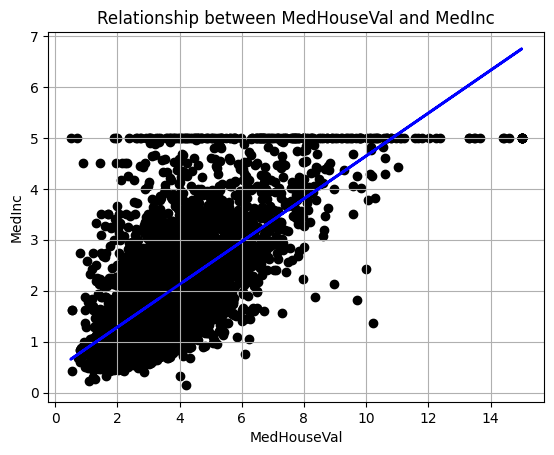

In [37]:
plt.scatter(x_test, y_test, color= 'black')
plt.plot(x_test, y_pred, color='blue', linewidth=2)
plt.xlabel('MedHouseVal')
plt.ylabel('MedInc')
plt.title('Relationship between MedHouseVal and MedInc')
plt.grid(True)
plt.show()